# Capstone Project - The Battle of Swiss Ski Resorts

## Purpose

This document provides the details of my submission for the IBM Data Science Professional Certificate program on Coursera.

## Table of contents
* [Introduction](#introduction)
* [Data Acquisition](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

<hr>

## 1. Introduction <a name="introduction"></a>

Switzerland has numerous ski areas, all of which have their own advantages. However, not all ski areas offer the same venues. In particular, if you want to spend your holiday in a nearby village, you need to consider which venues you would like to benefit from. Some resorts offer wellness facilities, others focus more on culture, and still others offer a wide range of bars and pubs.

### 1.1 Business Problem <a name="problem"></a>

For tourists who want to visit more than just one ski area, it is difficult to find out which places suit their needs. Data analysis can help to solve this problem. If a tourist likes what is on offer in the Laax ski area for example, what other areas are quite similar or belong to the same category? The focus of this analysis is based not only on the ability to ski but also on venues in nearby villages i.e. resorts. 

Furthermore, the analysis enables tourist regions to determine their own position and to orientate their marketing activities accordingly.

### 1.2 Interest

The conclusion of this report is primarily interesting for tourists who want to find ski resorts with similar size or off-piste offers. Therefore, the target audience highly likely stays overnight.

On the other hand, the same evaluation might be helpful for tourist regions to compare themselves with their competitors.

<hr>

## 2. Data Acquisition <a name="data"></a>

### 2.1 Data Sources

#### List of Swiss Ski Areas and Resorts
The list of Swiss ski areas will be obtained from Wikipedia:

https://en.wikipedia.org/wiki/List_of_ski_areas_and_resorts_in_Switzerland

It not only contains all resorts but also information about their size i.e. the number of lifts and ski pistes.

<ul>
    <li> Name of Ski area, e.g. Matterhorn ski paradise
    <li> Resorts (nearby villages), e.g. St. Moritz
    <li> Number of lifts, e.g. 114/78/12 (skilift/chair-lift/cable car)
    <li> Number of pistes km, e.g. 239
</ul>

The assignment of latitude and longitude by using GeoPy will be based on the column "Resort" since this content resprents villages nearby ski areas.

#### List of nearby venues
The Foursquare location data is used to explore nearby venues.
Foursquare provides the following data:
<ul>
    <li> Venue Name, e.g. Fort D’artillerie	
    <li> Coordinates, e. g. 46.026147 / 7.122204
    <li> Category Name, e.g. Museum
</ul>

Information about the ski area as well as their nearby venues are then used to categorize each resort.

### 2.2 Data Preparation for Swiss Ski Resorts

We have to obtain latitude & longitude coordinates for centroids of our candidate resorts. We first need to obtain data from our sourcepage on Wikipedia. Afterwards, GeoPy will help us to find the coordinates of our resort centers.

Since one ski area can be composed of several resorts, we will find centroids for all of its resorts. This is chosen because tourists usually stay in the village overnight and not in a ski area itself. Therefore, venues close to a village/resort is more important.

#### 2.2.1 Data Obtaining

So, let's first import the list of ski areas.

In [21]:
#!conda install -c conda-forge wikipedia --yes
import wikipedia as wp
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

#Import page
html = wp.page("List_of_ski_areas_and_resorts_in_Switzerland").html()

In [22]:
#Create Dataframe
valais = pd.read_html(html)[0]
berne = pd.read_html(html)[1]
central = pd.read_html(html)[2]
graubuenden = pd.read_html(html)[3]
eastern = pd.read_html(html)[4]

df = pd.DataFrame()
df = df.append([valais, berne, central, graubuenden, eastern])
df

,Name,Resorts,Altitude bottom m,Altitude top m,Lifts1,Ski pistes km,Website
0,Champex-Lac,Champex-Lac,1500,2000,4,20,http://www.champex.info
1,Matterhorn ski paradise,Zermatt,1600,3900,103,313,Matterhorn ski paradise
2,Les Portes du Soleil,"Morgins, Champéry, Les Crosets",1000,2500,114/78/12,650,Les Portes du Soleil
3,Verbier - Les quatre vallées,"Verbier, Nendaz, Veysonnaz",1350,3330,50/32/18,410,Verbier - Les quatre vallées Nendaz - Les 4 Va...
4,Skiregion Aletsch,"Belalp, Bettmeralp, Fiesch, Riederalp",1050,3118,38/7/4,239,Aletsch
5,Crans Montana,"Crans, Barzettes, Montana, Aminona",1500,3000,30/10/7,200,Crans Montana
6,Sierre-Anniviers,"Grimentz, Zinal, Vercorin, St-Luc und Chandolin",1340,3025,37/3/4,230,Val d'Anniviers
7,Saas Fee,"Saas Fee, Saas Balen, Saas Grund",1470,3600,37/4/15,145,Saas Fee
8,Leysin,"Leysin, Les Mosses, La Lecherette",1253,2200,19/7/3,100,Leysin
9,Les Diablerets,Les Diablerets,1200,2971,27/10/8,80,Les Diablerets


#### 2.2.2 Data Cleaning

Next, we get rid of unnecessary data and clean some information.

In [268]:
#Drop columns "Website, Altitude top, Altitude bottom"
df = df.drop(columns=['Altitude bottom m', 'Altitude top m', 'Website'])

#Rename columns
df = df.rename(columns={"Name": "Ski_Area", "Resorts": "Resort", "Lifts1": "Lifts", "Ski pistes km":"pistes_km"})

#Clean parsing problems
df = df.replace(to_replace ="Ã¶", value ="ö", regex=True) 
df = df.replace(to_replace ="Ã©", value ="é", regex=True)
df = df.replace(to_replace ="Ã¨", value ="è", regex=True)
df = df.replace(to_replace ="Ã¼", value ="ü", regex=True)

#Reset index
df = df.reset_index(drop=True)

#Split Villages
df = (df.set_index(df.columns.drop('Resort',2).tolist())
    .Resort.str.split(',', expand=True)
    .stack()
    .reset_index()
    .rename(columns={0:'Resort'})
    .loc[:, df.columns]
)

df.head()

,Ski_Area,Resort,Lifts,pistes_km
0,Champex-Lac,Champex-Lac,4,20
1,Matterhorn ski paradise,Zermatt,103,313
2,Les Portes du Soleil,Morgins,114/78/12,650
3,Les Portes du Soleil,Champéry,114/78/12,650
4,Les Portes du Soleil,Les Crosets,114/78/12,650


In order to have a better understanding of the size of a ski resort we should calculate the total of all lifts (skilift/chair-lift/cable car).

In [269]:
#Function to calculate sum
def calculate_sum(row):
    return row[0] + row[1] + row[2]

In [270]:
#Split lifts and set type to numeric
lifts = df['Lifts'].str.split('/', expand=True)
lifts = pd.DataFrame(lifts.replace(to_replace =[None], value =0.0, regex=True))
lifts[0] = pd.to_numeric(lifts[0])
lifts[1] = pd.to_numeric(lifts[1])
lifts[2] = pd.to_numeric(lifts[2])

#Calculate sum
lifts['Total'] = lifts.apply(calculate_sum, axis=1).astype(int)

#Replace values in original dataframe
df['Lifts'] = lifts['Total']
df.head()

,Ski_Area,Resort,Lifts,pistes_km
0,Champex-Lac,Champex-Lac,4,20
1,Matterhorn ski paradise,Zermatt,103,313
2,Les Portes du Soleil,Morgins,204,650
3,Les Portes du Soleil,Champéry,204,650
4,Les Portes du Soleil,Les Crosets,204,650


In [271]:
print("The size of our dataframe: ")
df.shape

The size of our dataframe: 


(88, 4)

#### 2.2.3 Data Normalization

We now normalize the size of ski areas.

In [272]:
from sklearn import preprocessing
#df1 = df[['Resort','Lifts', 'pistes_km']]
# Normalize The Column
# Create x, where x the 'scores' column's values as floats
x = df[['pistes_km']].values.astype(float)
y = df[["Lifts"]].values.astype(float)
    
# Run the normalizer on the dataframe
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
y_scaled = min_max_scaler.fit_transform(y)
y_df = pd.DataFrame(y_scaled, columns=['Lifts Normalized'])
x_df = pd.DataFrame(x_scaled, columns=['Pistes Normalized'])

df = df.merge(y_df, left_index=True, right_index=True)
df = df.merge(x_df, left_index=True, right_index=True)
df = df.drop(['Lifts', 'pistes_km'], axis=1)

In [273]:
df.head()

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized
0,Champex-Lac,Champex-Lac,0.000,0.000000
1,Matterhorn ski paradise,Zermatt,0.495,0.465079
2,Les Portes du Soleil,Morgins,1.000,1.000000
3,Les Portes du Soleil,Champéry,1.000,1.000000
4,Les Portes du Soleil,Les Crosets,1.000,1.000000


#### 2.2.4 Data enhancing

As we now have all villages we can find the coordinates of their centroid.

In [274]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapp', timeout=3)

#Function to get Latitude and Longitude. 
#Adding country code to ensure that only places within Switzerland are found.
def getLatitude(row):
    resort = row['Resort'] + " CH"
    lat = geolocator.geocode(resort).latitude
    return lat

def getLongitude(row):
    resort = row['Resort'] + " CH"
    lon = geolocator.geocode(resort).longitude
    return lon

In [275]:
#Enhance Dataframe with coordiates
df['Latitude'] = df.apply(getLatitude, axis=1)
df['Longitude'] = df.apply(getLongitude, axis=1)

#Fix mismatches by adding code of canton
df.loc[12, "Latitude"] = geolocator.geocode("Crans VS CH").latitude
df.loc[12, "Longitude"] = geolocator.geocode("Crans VS CH").longitude
df.loc[30, "Latitude"] = geolocator.geocode("Villars VD CH").latitude
df.loc[30, "Longitude"] = geolocator.geocode("Villars VD CH").longitude
df.loc[48, "Latitude"] = geolocator.geocode("Flühli LU CH").latitude
df.loc[48, "Longitude"] = geolocator.geocode("Flühli LU CH").longitude
df.loc[68, "Latitude"] = geolocator.geocode("Ischgl A").latitude
df.loc[68, "Longitude"] = geolocator.geocode("Ischgl A").longitude

#### 2.2.3 Final Dataset of all Swiss Ski Resorts

In [276]:
print('Our final Dataset for all Swiss Ski Resorts has a shape of: {} '.format(df.shape))

Our final Dataset for all Swiss Ski Resorts has a shape of: (88, 6) 


In [277]:
display(df)

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized,Latitude,Longitude
0,Champex-Lac,Champex-Lac,0.000,0.000000,46.030578,7.116816
1,Matterhorn ski paradise,Zermatt,0.495,0.465079,46.022227,7.749400
2,Les Portes du Soleil,Morgins,1.000,1.000000,46.237659,6.858102
3,Les Portes du Soleil,Champéry,1.000,1.000000,46.175679,6.868767
4,Les Portes du Soleil,Les Crosets,1.000,1.000000,46.185115,6.835676
5,Verbier - Les quatre vallées,Verbier,0.480,0.619048,46.096795,7.228548
6,Verbier - Les quatre vallées,Nendaz,0.480,0.619048,46.186708,7.305101
7,Verbier - Les quatre vallées,Veysonnaz,0.480,0.619048,46.195508,7.336327
8,Skiregion Aletsch,Belalp,0.225,0.347619,46.371436,7.972471
9,Skiregion Aletsch,Bettmeralp,0.225,0.347619,46.390600,8.062883


#### 2.2.4. Map of all Swiss Ski Resorts

In [278]:
import folium

#Define map center (center of Switzerland)
latitude = 46.800663464 
longitude = 8.222665776

#Create Map
map_resorts = folium.Map(location=[latitude, longitude], zoom_start=8)

#add markers to map
for lat, lng, area, resort in zip(df['Latitude'], df['Longitude'], df['Ski_Area'], df['Resort']):
    label = '{}, {}'.format(resort, area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_resorts)  
    
map_resorts

### 2.3 Data Obtaining for Venues

Now that we have our resort candidates, let's use Foursquare API to get info on venues in each resort.
We're interested in venues of all categories. Despite Foursquare delivers several subcategories such as "Italian restaurant", we are interested in less granular categores as we need info on a wide range of offers within an area.

Foursquare credentials are defined in hidden cell bellow.

In [279]:
# The code was removed by the author for sharing.

First, we need to obtain all kind of nearby venues. Since we are looking for venues within an entire village, we set a radius of 1.5 kilometers. Most resorts are located in remote places. Therefore, this range will cover an appropriate area.

The search will go for a maximum of 100 venues within the given radius. Found venues, its coordinates and categories are returned in a dataset.

Considering what tourists would like to do most likely off-piste, I only gather venues of the following categories:

* Culture & Entertainment
* Events
* Nightlife
* Nature & Leisure
* Business & Services
* Railway station
* Bicycle rental
* Motorhome parking
* Car rental

In [281]:
import json
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors

#Function to explore narby venues by given categories
def getNearbyVenuesTest(names, latitudes, longitudes):
    LIMIT = 100
    RADIUS = 1500

    print('getNearbyVenues processing...')
    
    venues_list=[]
    
    #for each resort
    for name, lat, lng in zip(names, latitudes, longitudes):
        print("Get venues for " + name)
        #get venues for each category
        #Categories: Culture & Entertainment, Events, Nightlife, Nature & Leisure, 
        #Business & Services, Railway station, Bicycle rental, Motorhome parking, Car rental
        venue_root_categories = ["4d4b7104d754a06370d81259", "4d4b7105d754a06373d81259", '4d4b7105d754a06376d81259',
                                "4d4b7105d754a06377d81259", "4d4b7105d754a06378d81259", "4bf58dd8d48988d129951735", 
                                 "4e4c9077bd41f78e849722f9", "52f2ab2ebcbc57f1066b8b53", "4bf58dd8d48988d1ef941735"]
        
        for category in venue_root_categories:
            url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, category, RADIUS, LIMIT)
        
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Resort',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']
    
    print('Nearby venues stored.')
    return(nearby_venues)      

In [282]:
#df_venues = getNearbyVenuesTest(names=df['Resort'], latitudes=df['Latitude'], longitudes=df['Longitude'])

In [283]:
#Protect requested df
dfvenues = df_venues
dfvenues.head()

,Resort,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Champex-Lac,Fort D’artillerie,46.026147,7.122204,Museum
1,Champex-Lac,Mylord,46.029925,7.117038,Pub
2,Champex-Lac,Champex-Lac,46.030285,7.116374,Ski Chalet
3,Champex-Lac,Jardin botanique Alpin Flore-Alpe,46.032566,7.112943,Botanical Garden
4,Champex-Lac,Ecole Suisse de Ski & Snowboard,46.031083,7.111644,Athletics & Sports


#### 2.3.1 Data Cleaning

Let's drop all rows with a venue Ski Area, Cable Car, Chairlift, Mountain and Ski Trail since we only list places next to a ski area. We will ignore a resorts accessibility by public transportation, so we drop train and bus stations as well. We also group the restaurant category in order to achieve less granularity. We do the same with bars.

In [284]:
#Drop categories
dfvenues = dfvenues.drop(dfvenues[dfvenues["Venue Category"] == "Ski Area"].index)
dfvenues = dfvenues.drop(dfvenues[dfvenues["Venue Category"] == "Ski Chairlift"].index)
dfvenues = dfvenues.drop(dfvenues[dfvenues["Venue Category"] == "Cable Car"].index)
dfvenues = dfvenues.drop(dfvenues[dfvenues["Venue Category"] == "Mountain"].index)
dfvenues = dfvenues.drop(dfvenues[dfvenues["Venue Category"] == "Ski Trail"].index)
dfvenues = dfvenues.drop(dfvenues[dfvenues["Venue Category"] == "Resort"].index)
dfvenues = dfvenues.drop(dfvenues[dfvenues["Venue Category"] == "Hotel"].index)
dfvenues = dfvenues.drop(dfvenues[dfvenues["Venue Category"] == "Ski Chalet"].index)
dfvenues = dfvenues.drop(dfvenues[dfvenues["Venue Category"] == "Construction & Landscaping"].index)
dfvenues = dfvenues.drop(dfvenues[dfvenues["Venue Category"] == "Supermarket"].index)
dfvenues = dfvenues.drop(dfvenues[dfvenues["Venue Category"] == "Grocery Store"].index)
dfvenues.loc[dfvenues["Venue Category"].str.contains("Restaurant"), "Venue Category"] = "Restaurant"
dfvenues = dfvenues.drop(dfvenues[dfvenues["Venue Category"] == "Restaurant"].index)

In [285]:
#Clean category types - not done
dfvenues.loc[dfvenues["Venue Category"].str.contains("Tea Room"), "Venue Category"] = "Café"
dfvenues.loc[dfvenues["Venue Category"].str.contains("Coffee"), "Venue Category"] = "Café"
dfvenues.loc[dfvenues["Venue Category"].str.contains("Cafeteria"), "Venue Category"] = "Café"
dfvenues.loc[dfvenues["Venue Category"].str.contains("Ski Bar"), "Venue Category"] = "Après Ski"
dfvenues.loc[dfvenues["Venue Category"].str.contains("Gym Pool"), "Venue Category"] = "Spa"
dfvenues.loc[dfvenues["Venue Category"].str.contains("Pool"), "Venue Category"] = "Spa"
dfvenues.loc[dfvenues["Venue Category"].str.contains("Gym"), "Venue Category"] = "Gym"
dfvenues.loc[dfvenues["Venue Category"].str.contains("City"), "Venue Category"] = "Town"

#### 2.3.2 Final Dataset of all Venues

In [286]:
print('Our final Dataset for all Venues has a shape of: {} '.format(dfvenues.shape))

Our final Dataset for all Venues has a shape of: (1189, 5) 


In [287]:
print('There are {} uniques categories.'.format(len(dfvenues['Venue Category'].unique())))

There are 158 uniques categories.


In [288]:
dfvenues.head()

,Resort,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Champex-Lac,Fort D’artillerie,46.026147,7.122204,Museum
1,Champex-Lac,Mylord,46.029925,7.117038,Pub
3,Champex-Lac,Jardin botanique Alpin Flore-Alpe,46.032566,7.112943,Botanical Garden
4,Champex-Lac,Ecole Suisse de Ski & Snowboard,46.031083,7.111644,Athletics & Sports
5,Champex-Lac,Camping Les Rocailles,46.031483,7.108176,Campground


So now I have all Ski Areas in Switzerland and its resorts. I also know nearby venues in an area within 1.5 kilometers from each resort, and I know which ones are from what category.

This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report on the similarity of Swiss Ski Resorts!

<hr>

## 3. Methodology <a name="methodology"></a>

In this project I will direct my efforts on detecting Swiss Ski resorts that have high similarities regarding its size and nearby venues or in other words with a view on offers that can also be obtained off-piste. I will limit my analysis to area 1.5km around resort centers.

In first step I have collected the required data: ski areas and venues. I have identified every resort of which a ski area is composed of. After, I obtained location and categories of venues within 1.5km from each resort center. For each resort I limited the number of categories to the given nine and the number of venues to 100.

Second step in my analysis will be exploring the venue categories across different resorts. I will figure out in what categories a specific resort is very strong and in what categories it has slighter density of offers. Then, I combine these results with the size of each ski area a resort belongs to. In order to find categories, all this information is used to create clusters (using k-means clustering). With the python folium library, I will present a map of all ski resorts to visualize their cluster. A description of the clusters completes the work.

<hr>

## 4. Analysis <a name="analysis"></a>

### 4.1 Exploring data

In order to see trends regarding venue categories, we calculate the frequency of occurrence of a venue category for each resort.

The frequency over all resorts shows the mean occurencies of categories. Most venues at the top are related to food. Offers for spa, cultur or other adventures follow later on.

In [289]:
onehot = pd.get_dummies(dfvenues[["Venue Category"]], prefix="", prefix_sep="")
onehot["Resort"] = dfvenues["Resort"] 
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

#Grouping rows by resort and by taking the frequency of occurrence of each category
venues_grouped = onehot.groupby("Resort").mean().reset_index()

In [290]:
#Get over all mean of frequency
mean_venues = venues_grouped.mean().to_frame()
mean_venues = mean_venues.sort_values(by=[0], ascending=False)
mean_venues.head()

,0
Bar,0.124446
Train Station,0.061660
Sporting Goods Shop,0.057576
Trail,0.056654
Après Ski,0.052064


This is just an over all information how an average resort might look like. But what are the most common venues for each resort? Let's examine the top 10.

In [291]:
#Function to find most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [321]:
#Getting the top 10 venues
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ["Resort"]
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
top_venues_sorted = pd.DataFrame(columns=columns)
top_venues_sorted["Resort"] = venues_grouped["Resort"]

for ind in np.arange(venues_grouped.shape[0]):
    top_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)
    
top_venues_sorted.head()

,Resort,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alt St. Johann,Trail,Bar,Zoo Exhibit,Garden Center,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival
1,Aminona,Museum,Gift Shop,Garden Center,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival,Farmers Market
2,Andiast,Stables,Zoo Exhibit,Gastropub,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival,Farmers Market
3,Barzettes,Bar,Photography Studio,Rental Car Location,Train Station,Bike Rental / Bike Share,Sports Bar,Gym,Museum,Trail,Cheese Shop
4,Bettmeralp,Bar,Après Ski,Sporting Goods Shop,Mini Golf,Sports Bar,Food & Drink Shop,Home Service,Bathing Area,Zoo Exhibit,Garden


### 4.2 Clustering resorts

Let's find the best k by using the Elbow method. To do so, we calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k and choose the k for which WSS first starts to diminish. 

In [300]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#conda install -c districtdatalabs yellowbrick

venues_grouped_clustering = venues_grouped
venues_grouped_clustering = venues_grouped_clustering.join(df.set_index('Resort'), on='Resort')
venues_grouped_clustering = venues_grouped_clustering.drop(['Resort', 'Ski_Area', 'Latitude', 'Longitude'], axis=1)

venues_grouped_clustering.head()

,ATM,Accessories Store,Amphitheater,Antique Shop,Après Ski,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Auto Garage,Baby Store,Bakery,Bar,Bathing Area,Beach,Beach Bar,Beer Bar,Beer Garden,Bike Rental / Bike Share,Board Shop,Bookstore,Botanical Garden,Boutique,Brewery,Business Service,Café,Campground,Candy Store,Carpet Store,Cheese Shop,Chocolate Shop,Clothing Store,Cocktail Bar,Comedy Club,Concert Hall,Conference,Convenience Store,Convention Center,Country Dance Club,Dance Studio,Department Store,Discount Store,Dry Cleaner,Electronics Store,Event Service,Event Space,Exhibit,Farm,Farmers Market,Festival,Flower Shop,Food & Drink Shop,Forest,Furniture / Home Store,Garden,Garden Center,Gastropub,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Gym,Harbor / Marina,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hot Spring,Hotel Bar,IT Services,Indie Movie Theater,Jazz Club,Jewelry Store,Lake,Lawyer,Lingerie Store,Locksmith,Lounge,Market,Massage Studio,Memorial Site,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Festival,Music Venue,Nature Preserve,Night Market,Nightclub,Nightlife Spot,Optical Shop,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Pharmacy,Photography Studio,Piano Bar,Pilates Studio,Platform,Playground,Plaza,Print Shop,Pub,Public Bathroom,RV Park,Recreation Center,Rental Car Location,Rental Service,River,Rock Club,Salsa Club,Scenic Lookout,Science Museum,Sculpture Garden,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Ski Lodge,Ski Shop,Smoke Shop,Smoothie Shop,Soccer Field,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stationery Store,Summer Camp,Surf Spot,Tennis Court,Theater,Toy / Game Store,Trail,Train,Train Station,Used Bookstore,Volleyball Court,Watch Shop,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Zoo Exhibit,Lifts Normalized,Pistes Normalized
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080,0.063492
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215,0.285714
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

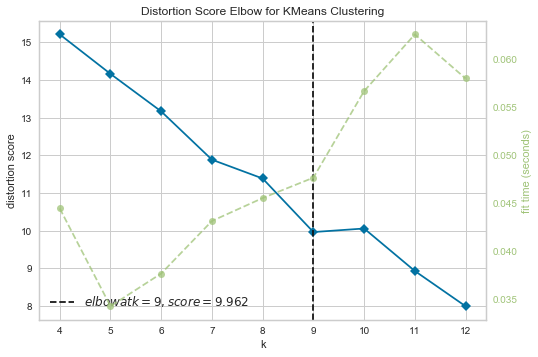

In [330]:
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

X = venues_grouped_clustering
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

visualizer.fit(X) 
visualizer.show()

If we set the parameter to find the best k between 4 and 13, we find en elbow at k=9. So we will set this as number of clusters for our k-means algorithm.

In [311]:
# run k-means clustering
kclusters = 9
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(venues_grouped_clustering)
top_venues_sorted.insert(0, "Cluster Labels", kmeans.labels_)

#add clusters to dataframe of ski resorts
df_merged = df
df_merged = df_merged.join(top_venues_sorted.set_index("Resort"), on="Resort")
df_merged = df_merged.fillna(0.0)

## 5. Results <a name="results"></a>

In [339]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, res, a, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Resort'], df_merged['Ski_Area'], df_merged['Cluster Labels']):
    label = folium.Popup(str(res) + ', '  + str(a) + ' / Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [318]:
df_merged

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Champex-Lac,Champex-Lac,0.000,0.000000,46.030578,7.116816,6.0,Trail,Pub,Botanical Garden,Campground,Athletics & Sports,Souvenir Shop,Museum,Festival,Garden,Furniture / Home Store
1,Matterhorn ski paradise,Zermatt,0.495,0.465079,46.022227,7.749400,1.0,Sporting Goods Shop,Bar,Après Ski,Clothing Store,Athletics & Sports,Boutique,Home Service,Trail,Lounge,Candy Store
2,Les Portes du Soleil,Morgins,1.000,1.000000,46.237659,6.858102,2.0,Bar,Après Ski,Board Shop,Pub,Sporting Goods Shop,Nightclub,Gym,Zoo Exhibit,Flower Shop,Garden
3,Les Portes du Soleil,Champéry,1.000,1.000000,46.175679,6.868767,2.0,Bar,Hotel Bar,Athletics & Sports,Lounge,Arts & Entertainment,Garden,Comedy Club,Ski Shop,Auto Garage,Convenience Store
4,Les Portes du Soleil,Les Crosets,1.000,1.000000,46.185115,6.835676,2.0,Bar,Lounge,Country Dance Club,Ski Lodge,Movie Theater,Festival,Garden,Furniture / Home Store,Forest,Food & Drink Shop
5,Verbier - Les quatre vallées,Verbier,0.480,0.619048,46.096795,7.228548,1.0,Bar,Après Ski,Nightclub,Sporting Goods Shop,Clothing Store,Photography Studio,Pub,Art Gallery,Concert Hall,Salsa Club
6,Verbier - Les quatre vallées,Nendaz,0.480,0.619048,46.186708,7.305101,1.0,Bar,Nightclub,Print Shop,Salsa Club,Clothing Store,Food & Drink Shop,Garden,Beer Garden,Sporting Goods Shop,Pub
7,Verbier - Les quatre vallées,Veysonnaz,0.480,0.619048,46.195508,7.336327,1.0,Bar,Convenience Store,Memorial Site,Sporting Goods Shop,Beer Bar,Zoo Exhibit,Flower Shop,Garden Center,Garden,Furniture / Home Store
8,Skiregion Aletsch,Belalp,0.225,0.347619,46.371436,7.972471,0.0,Sporting Goods Shop,Gastropub,Ski Lodge,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival,Farmers Market
9,Skiregion Aletsch,Bettmeralp,0.225,0.347619,46.390600,8.062883,0.0,Bar,Après Ski,Sporting Goods Shop,Mini Golf,Sports Bar,Food & Drink Shop,Home Service,Bathing Area,Zoo Exhibit,Garden


Let's sort my results by cluster 0.0 as an example and analyze it. What do I see? Well, the opening question of this report was the following: If a tourist likes what is on offer in the Laax ski area for example, what other areas are quite similar or belong to the same category?

Having a look on Laax I can first see that there is no big difference between its resorts. If I were staying in Laax itself, I can also go to Flims or Falera. Both resorts belong to same category which means that they most likely offer similar venues accessible within 1.5km.

Second, I could choose another resort, 'Leysin' for example. There are two resorts belonging to this ski area: La Lecherette and Les Mosses. If I want to stay in a resort of the same category as Laax, I should prefer La Lecherette, because Les Mosses belongs to another cluster.

#### Cluster 0.0

This is the biggest cluster. 
It contains resort where no venue could be found by Foursquare.

In [355]:
df_merged[df_merged['Cluster Labels'] == 0.0]

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Skiregion Aletsch,Belalp,0.225,0.347619,46.371436,7.972471,0.0,Sporting Goods Shop,Gastropub,Ski Lodge,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival,Farmers Market
9,Skiregion Aletsch,Bettmeralp,0.225,0.347619,46.390600,8.062883,0.0,Bar,Après Ski,Sporting Goods Shop,Mini Golf,Sports Bar,Food & Drink Shop,Home Service,Bathing Area,Zoo Exhibit,Garden
10,Skiregion Aletsch,Fiesch,0.225,0.347619,46.402946,8.134150,0.0,Nightclub,Nightlife Spot,Train Station,Night Market,Beach Bar,Bar,Gym,Other Nightlife,Concert Hall,Farm
11,Skiregion Aletsch,Riederalp,0.225,0.347619,46.378171,8.033135,0.0,Sporting Goods Shop,Bar,Trail,Music Venue,Train Station,Farmers Market,Garden,Furniture / Home Store,Forest,Food & Drink Shop
12,Crans Montana,Crans,0.215,0.285714,46.306917,7.469015,0.0,Golf Course,Bar,Boutique,Movie Theater,Electronics Store,Sporting Goods Shop,Après Ski,Watch Shop,Nightclub,Ski Shop
13,Crans Montana,Barzettes,0.215,0.285714,46.320596,7.498611,0.0,Bar,Photography Studio,Rental Car Location,Train Station,Bike Rental / Bike Share,Sports Bar,Gym,Museum,Trail,Cheese Shop
14,Crans Montana,Montana,0.215,0.285714,46.299956,7.485769,0.0,Golf Course,Sporting Goods Shop,Photography Studio,Electronics Store,Mini Golf,Auto Garage,Ski Shop,Gym,Bar,Cocktail Bar
15,Crans Montana,Aminona,0.215,0.285714,46.331426,7.532270,0.0,Museum,Gift Shop,Garden Center,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival,Farmers Market
16,Sierre-Anniviers,Grimentz,0.200,0.333333,46.180295,7.573834,0.0,Bar,Sporting Goods Shop,Après Ski,Gift Shop,Smoothie Shop,Nightclub,Cocktail Bar,Flower Shop,Garden,Furniture / Home Store
17,Sierre-Anniviers,Zinal,0.200,0.333333,46.136612,7.626600,0.0,Comedy Club,Bar,Après Ski,Pub,Sporting Goods Shop,Theater,Athletics & Sports,Baby Store,Outdoor Sculpture,Mini Golf


#### Cluster 1.0

Resorts in this cluster not only belong to large ski areas but also have Bars, Sporting Goods Shops and Clothing Stores on their list of most common venues.

In [356]:
df_merged[df_merged['Cluster Labels'] == 1.0]

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Matterhorn ski paradise,Zermatt,0.495,0.465079,46.022227,7.749400,1.0,Sporting Goods Shop,Bar,Après Ski,Clothing Store,Athletics & Sports,Boutique,Home Service,Trail,Lounge,Candy Store
5,Verbier - Les quatre vallées,Verbier,0.480,0.619048,46.096795,7.228548,1.0,Bar,Après Ski,Nightclub,Sporting Goods Shop,Clothing Store,Photography Studio,Pub,Art Gallery,Concert Hall,Salsa Club
6,Verbier - Les quatre vallées,Nendaz,0.480,0.619048,46.186708,7.305101,1.0,Bar,Nightclub,Print Shop,Salsa Club,Clothing Store,Food & Drink Shop,Garden,Beer Garden,Sporting Goods Shop,Pub
7,Verbier - Les quatre vallées,Veysonnaz,0.480,0.619048,46.195508,7.336327,1.0,Bar,Convenience Store,Memorial Site,Sporting Goods Shop,Beer Bar,Zoo Exhibit,Flower Shop,Garden Center,Garden,Furniture / Home Store
58,Engadin-St. Moritz,St. Moritz,0.485,0.523810,46.496059,9.838658,1.0,Boutique,Bar,Athletics & Sports,Clothing Store,Electronics Store,Nightclub,Train,Gastropub,Jewelry Store,Art Museum
59,Engadin-St. Moritz,Silvaplana,0.485,0.523810,46.459933,9.795917,1.0,Bar,Lounge,Campground,Lake,Sporting Goods Shop,Cocktail Bar,Surf Spot,Garden,Furniture / Home Store,Forest
60,Engadin-St. Moritz,Sils Maria,0.485,0.523810,46.429156,9.763788,1.0,Sporting Goods Shop,Trail,Lounge,Art Museum,Bar,Hobby Shop,Clothing Store,Gastropub,Waterfall,Event Service
61,Engadin-St. Moritz,Pontresina,0.485,0.523810,46.489993,9.904296,1.0,Train Station,Trail,Bar,Spa,IT Services,Home Service,Photography Studio,Museum,Zoo Exhibit,Farm
62,Engadin-St. Moritz,Celerina,0.485,0.523810,46.513230,9.858625,1.0,Platform,Bike Rental / Bike Share,Garden,Bar,Train Station,Train,Farmers Market,Garden Center,Furniture / Home Store,Forest
63,Engadin-St. Moritz,Zuoz,0.485,0.523810,46.601289,9.960804,1.0,Lounge,Hotel Bar,Food & Drink Shop,Skating Rink,Golf Course,Trail,Train Station,Home Service,Art Gallery,Indie Movie Theater


#### Cluster 2.0

Les Portes du Soleil is classified as unique in this evaluation. It's the largest ski area and offers lots of venues to party.

In [357]:
df_merged[df_merged['Cluster Labels'] == 2.0]

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Les Portes du Soleil,Morgins,1.0,1.0,46.237659,6.858102,2.0,Bar,Après Ski,Board Shop,Pub,Sporting Goods Shop,Nightclub,Gym,Zoo Exhibit,Flower Shop,Garden
3,Les Portes du Soleil,Champéry,1.0,1.0,46.175679,6.868767,2.0,Bar,Hotel Bar,Athletics & Sports,Lounge,Arts & Entertainment,Garden,Comedy Club,Ski Shop,Auto Garage,Convenience Store
4,Les Portes du Soleil,Les Crosets,1.0,1.0,46.185115,6.835676,2.0,Bar,Lounge,Country Dance Club,Ski Lodge,Movie Theater,Festival,Garden,Furniture / Home Store,Forest,Food & Drink Shop


#### Cluster 3.0

These resorts are strong at venues for Après Ski, followed by Museums or Exhibits.

In [358]:
df_merged[df_merged['Cluster Labels'] == 3.0]

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Lötschental,Wiler (Lötschen),0.005,0.020635,46.408307,7.784841,3.0,Après Ski,Trail,Ski Lodge,Bar,History Museum,Gastropub,Festival,Garden,Furniture / Home Store,Forest
47,Sörenberg,Sörenberg,0.090,0.047619,46.807715,8.037136,3.0,Après Ski,Mini Golf,History Museum,Bar,Zoo Exhibit,Festival,Garden Center,Garden,Furniture / Home Store,Forest
49,Hoch-Ybrig,Oberiberg,0.035,0.047619,47.039177,8.783416,3.0,Après Ski,Zoo Exhibit,Farmers Market,Garden Center,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival


#### Cluster 4.0

In this cluster there are resorts with remarkably few bars or pubs but lots of them offer a scenic lookout.

In [359]:
df_merged[df_merged['Cluster Labels'] == 4.0]

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Saas Fee,Saas Balen,0.260,0.198413,46.154021,7.928192,4.0,Campground,Scenic Lookout,Food & Drink Shop,Zoo Exhibit,Farmers Market,Garden,Furniture / Home Store,Forest,Flower Shop,Festival
31,Villars-Gryon,Gryon,0.035,0.087302,46.274663,7.063671,4.0,Garden,Campground,Plaza,Food & Drink Shop,Platform,Sporting Goods Shop,Scenic Lookout,Mini Golf,Pharmacy,Music Venue
40,Alpenregion Meiringen-Hasliberg,Hasliberg,0.060,0.063492,46.737906,8.205257,4.0,Beer Garden,Cocktail Bar,Speakeasy,Zoo Exhibit,Festival,Garden Center,Garden,Furniture / Home Store,Forest,Food & Drink Shop
46,Airolo-Pesciüm,Airolo-Pesciüm,0.020,0.015873,46.514385,8.608116,4.0,Scenic Lookout,Bike Rental / Bike Share,Bar,Train Station,Train,Farmers Market,Garden Center,Garden,Furniture / Home Store,Forest
48,Sörenberg,Flühli,0.090,0.047619,46.884007,8.015640,4.0,Scenic Lookout,Playground,Zoo Exhibit,Farm,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival
50,Hoch-Ybrig,Unteriberg,0.035,0.047619,47.059802,8.803527,4.0,Locksmith,Paper / Office Supplies Store,Food & Drink Shop,Sporting Goods Shop,Recreation Center,Garden,Furniture / Home Store,Forest,Lawyer,Flower Shop
69,Gotthard Oberalp Arena,Disentis,0.090,0.142857,46.704175,8.854978,4.0,Train Station,Convenience Store,Gym,Sports Bar,Stables,Home Service,Train,Scenic Lookout,Campground,Food & Drink Shop
75,Brigels,Waltensburg,0.025,0.087302,46.776679,9.116054,4.0,Scenic Lookout,Soccer Field,Stables,Train Station,Zoo Exhibit,Farm,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop
81,Flumserberg,Unterterzen,0.065,0.071429,47.113954,9.252290,4.0,Scenic Lookout,Spa,Pub,Sporting Goods Shop,Flower Shop,Beach,Forest,Train Station,Harbor / Marina,Pilates Studio
87,Braunwald,Braunwald,0.025,0.019048,46.939005,8.998280,4.0,Playground,Train Station,Soccer Field,Tennis Court,Gastropub,Sporting Goods Shop,Brewery,Athletics & Sports,Zoo Exhibit,Furniture / Home Store


#### Cluster 5.0

These resorts seem to not offer a wide variety of venues for leisure.

In [360]:
df_merged[df_merged['Cluster Labels'] == 5.0]

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Leysin,Les Mosses,0.125,0.126984,46.466297,7.017835,5.0,Train Station,Zoo Exhibit,Farm,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival,Farmers Market
45,Gotthard Oberalp Arena,Hospental,0.095,0.055556,46.618945,8.568599,5.0,Trail,Train Station,Zoo Exhibit,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival,Farmers Market
71,Gotthard Oberalp Arena,Dieni,0.090,0.142857,46.670839,8.743998,5.0,Train Station,Playground,Campground,Zoo Exhibit,Farmers Market,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop


#### Cluster 6.0

Bars, Pubs and a wide variety on shops - these resorts might come close to the ones in cluster 1.0

In [361]:
df_merged[df_merged['Cluster Labels'] == 6.0]

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Champex-Lac,Champex-Lac,0.000,0.000000,46.030578,7.116816,6.0,Trail,Pub,Botanical Garden,Campground,Athletics & Sports,Souvenir Shop,Museum,Festival,Garden,Furniture / Home Store
23,Leysin,Leysin,0.125,0.126984,46.343870,7.014840,6.0,Bar,Train Station,Concert Hall,Sporting Goods Shop,Go Kart Track,Pharmacy,Print Shop,Pub,RV Park,Cocktail Bar
26,Les Diablerets,Les Diablerets,0.205,0.095238,46.351102,7.156644,6.0,Bar,Ski Shop,Nightclub,Indie Movie Theater,Scenic Lookout,Train Station,Cheese Shop,Zoo Exhibit,Farmers Market,Forest
27,Leukerbad,Leukerbad,0.045,0.063492,46.379517,7.626476,6.0,Sporting Goods Shop,Train,Bar,Spa,Music Venue,Athletics & Sports,Mini Golf,Exhibit,Gym,Market
29,Anzère,Anzère,0.035,0.031746,46.296935,7.397920,6.0,Bar,Lounge,Board Shop,Wine Bar,Country Dance Club,Plaza,Rock Club,Ski Shop,Music Venue,Festival
30,Villars-Gryon,Villars,0.035,0.087302,46.297764,7.055331,6.0,Bar,Train Station,Tennis Court,Athletics & Sports,Food & Drink Shop,Print Shop,Sporting Goods Shop,Movie Theater,Photography Studio,Concert Hall
39,Alpenregion Meiringen-Hasliberg,Meiringen,0.060,0.063492,46.728552,8.187093,6.0,Bar,Train,Print Shop,Train Station,Pub,Music Venue,Movie Theater,Cheese Shop,Trail,Science Museum
43,Engelberg Titlis,Engelberg,0.190,0.098413,46.822350,8.404400,6.0,Bar,Sporting Goods Shop,Movie Theater,Lawyer,Train,Festival,Sports Bar,Cheese Shop,Clothing Store,Trail
44,Gotthard Oberalp Arena,Andermatt,0.095,0.055556,46.634050,8.594815,6.0,Bar,Train,Train Station,Sporting Goods Shop,Hotel Bar,Beer Garden,Recreation Center,Outdoors & Recreation,Golf Course,Pub
70,Gotthard Oberalp Arena,Sedrun,0.090,0.142857,46.680959,8.776220,6.0,Train Station,Bar,Board Shop,Summer Camp,Playground,Lake,River,Scenic Lookout,Science Museum,Farm


#### Cluster 7.0

Based on this analysis, this lonely resort seems to be inhabited mainly by locals.

In [363]:
df_merged[df_merged['Cluster Labels'] == 7.0]

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
76,Brigels,Andiast,0.025,0.087302,46.784958,9.114178,7.0,Stables,Zoo Exhibit,Gastropub,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival,Farmers Market


#### Cluster 8.0

Both resorts lead with trails. 

In [364]:
df_merged[df_merged['Cluster Labels'] == 8.0]

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Sierre-Anniviers,St-Luc und Chandolin,0.20,0.333333,46.236536,7.627631,8.0,Trail,Zoo Exhibit,Gastropub,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival,Farmers Market
83,Toggenburg,Unterwasser,0.08,0.063492,47.197779,9.308989,8.0,Trail,Music Venue,Zoo Exhibit,Garden Center,Garden,Furniture / Home Store,Forest,Food & Drink Shop,Flower Shop,Festival


#### Cluster 9.0

Empty.

In [365]:
df_merged[df_merged['Cluster Labels'] == 9.0]

,Ski_Area,Resort,Lifts Normalized,Pistes Normalized,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


This concludes our analysis. We have created 9 categories representing similar resorts based on the size of a ski area as well as venues for leisure activities. Most of the resorts belong to either cluster 0.0 or 6.0. 

<hr>

## 6. Discussion <a name="discussion"></a>

For this study, 88 Swiss Ski Resort were used. These are all resorts listed on Wikipedia’s page whose link is mentioned in the beginning of this report. The number of 88 resorts, however, is not the actual number of resorts in Switzerland. For this study, all data from the Wikipedia page in English are used. The German page would list some more resorts. Some smaller resorts such as Axalp, Stoos or Melchsee-Frutt are therefore not part of this analysis. 

When I tested the Elbow method to evaluate the cluster parameter for kmeans, I set the optimum k value to 9. However, only 8 clusters were used. I experimented with different parameters to find an optimum k. I expanded the radius for nearby venues, set different widths for k and experimented with diverse samples of venue categories. As I mentioned before, I dropped restaurants, hotels and supermarkets. This happened after experimenting clusters considering these categories as well. However, there was clear evidence, that these categories cloud the results due to their huge volume.
Overall, it was very difficult to find an optimal k at all. For a lot of possibilities there was no Elbow found. This leads me to believe, that either lots of resorts are very similar or the data used was not from enough quality. Based on my knowledge about Swiss Ski Resorts I found out that looking on Switzerland, there is a weak degree of completeness for venues in the Foursquare database. To achieve a result of higher quality it might be necessary, to gather more data from another source. 

On the other hand, the quality could also be enhanced by adding a price tier for resorts. For example, St. Moritz is geared towards high-end clients, while others focus more on families. This not only has an impact on the range of venues on offer, but also on pricing. However, regarding Cluster 1.0 this might already have happened without considering a price tier.

I ended my study by visualizing the clusters based on size and venues. For future studies it could be an option to category resorts only by venues and use visualization tools to show their size e.g. as a larger bubble.

<hr>

## 7. Conclusion <a name="conclusion"></a>

As a result, we can see that not all resorts belonging to the same ski area are similar to each other. This insight is a chance for tourists as well as for the ski areas itself. If the resorts of one area don’t belong to one single category, the offer of a ski resort meets the needs of a wider range of holidaymakers. 

Furthermore, there are similar resorts all over the country which offers tourists a wide choice or even alternative possibilities.